In [73]:
# Loading libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Data manipulation

df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Convert 'Total Charges' into numerical values

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce') # erros = 'coerce' is used if there are any non-numeric values in the 'TotalCharges' column, they will be replaced with NaN.

# Check for missing values

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Calculate the missing values 
def missing_values(n):
    df_m=pd.DataFrame()
    df_m["missing_values, %"]=df.isnull().sum()*100/len(df.isnull())
    df_m["missing_values, sum"]=df.isnull().sum()
    return df_m.sort_values(by="missing_values, %", ascending=False)
missing_values(df)

,"missing_values, %","missing_values, sum"
TotalCharges,0.156183,11
gender,0.000000,0
SeniorCitizen,0.000000,0
MonthlyCharges,0.000000,0
PaymentMethod,0.000000,0
PaperlessBilling,0.000000,0
Contract,0.000000,0
StreamingMovies,0.000000,0
StreamingTV,0.000000,0
TechSupport,0.000000,0


In [10]:
# Filter df to find rows that have missing values in 'Total Charges'

df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
# Filter df to find the index positions of rows where the 'tenure' column has a value of 0

df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
# Impute missing values with corresponding monthly charges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [13]:
# Check for missing values again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Define numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe().T # Describing descriptive stats of the data

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


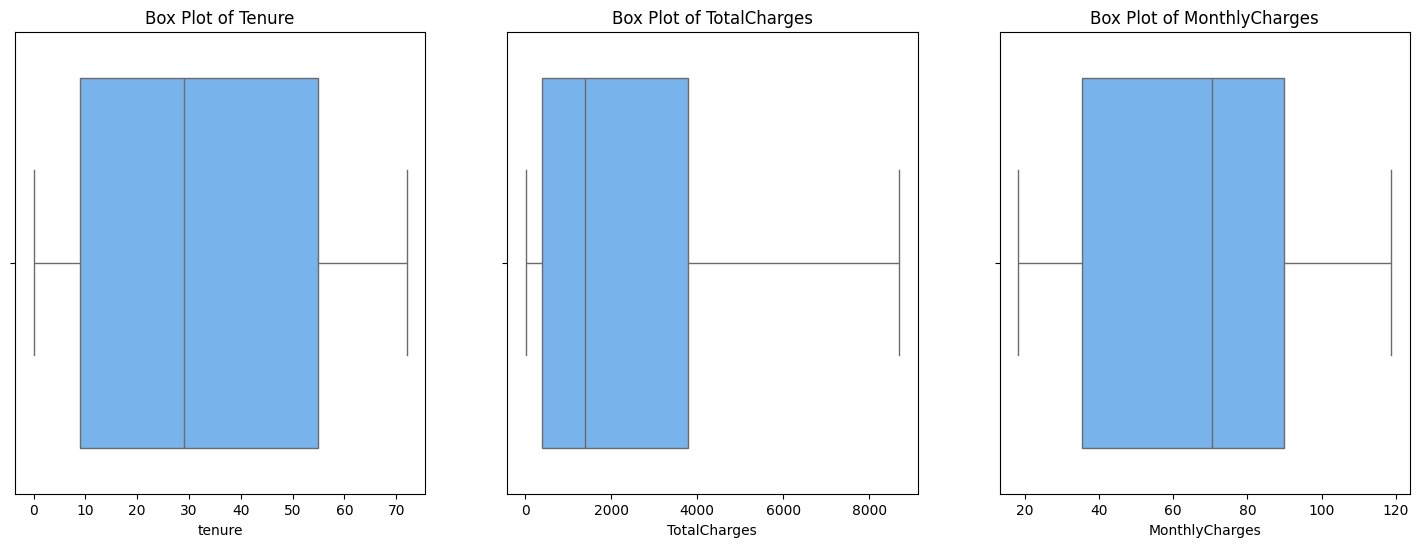

In [20]:
# Create separate box plots for 'tenure', 'TotalCharges', and 'MonthlyCharges'
plt.figure(figsize=(18, 6))

# Box Plot of 'tenure'
plt.subplot(131)  # 1 row, 3 columns, plot 1
sns.boxplot(x=df['tenure'], color='#66b3ff')
plt.title("Box Plot of Tenure")

# Box Plot of 'TotalCharges'
plt.subplot(132)  # 1 row, 3 columns, plot 2
sns.boxplot(x=df['TotalCharges'], color='#66b3ff')
plt.title("Box Plot of TotalCharges")

# Box Plot of 'MonthlyCharges'
plt.subplot(133)  # 1 row, 3 columns, plot 3
sns.boxplot(x=df['MonthlyCharges'], color='#66b3ff')
plt.title("Box Plot of MonthlyCharges")

plt.show()


In [21]:
# Check for unique values to be make informed encoding decision  
unique_counts = df.nunique()
print("Unique Value Counts:")
print(unique_counts)

Unique Value Counts:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [22]:
# Label-Encoding for Categorical Data
# Change data type for categorical data variables
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df[cols] = df[cols].astype('category')

# Label encoding for categorical data variables
for column in cols:
    df[column] = df[column].cat.codes

# Check data types of all columns
print(df.dtypes)

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       int8
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                  int8
dtype: object


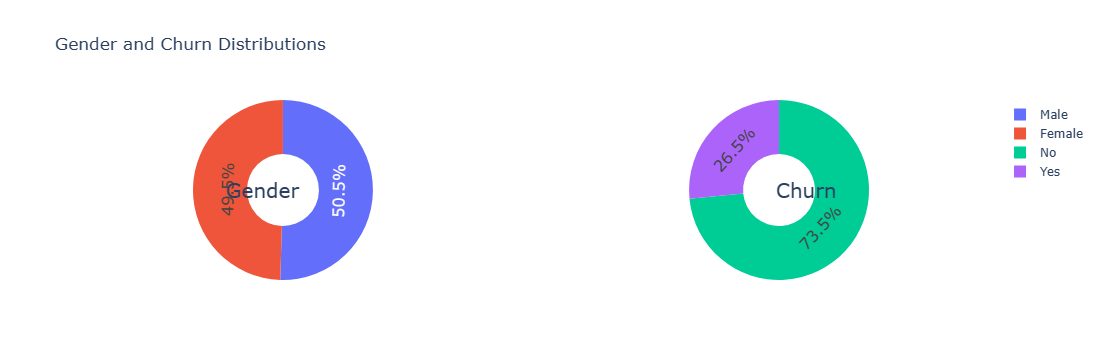

In [26]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()


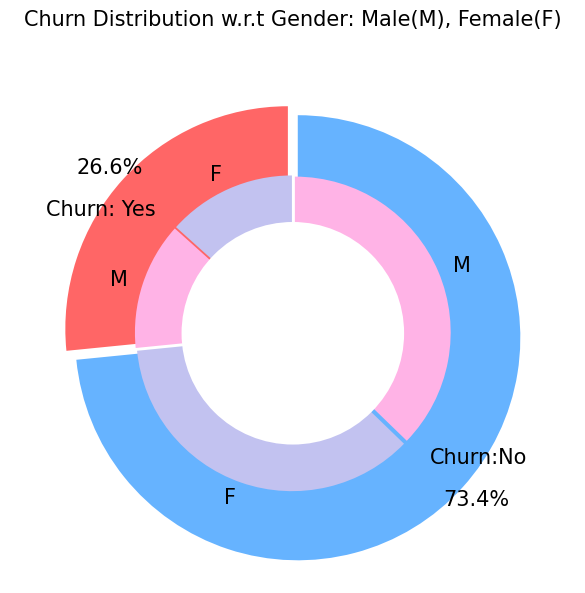

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()


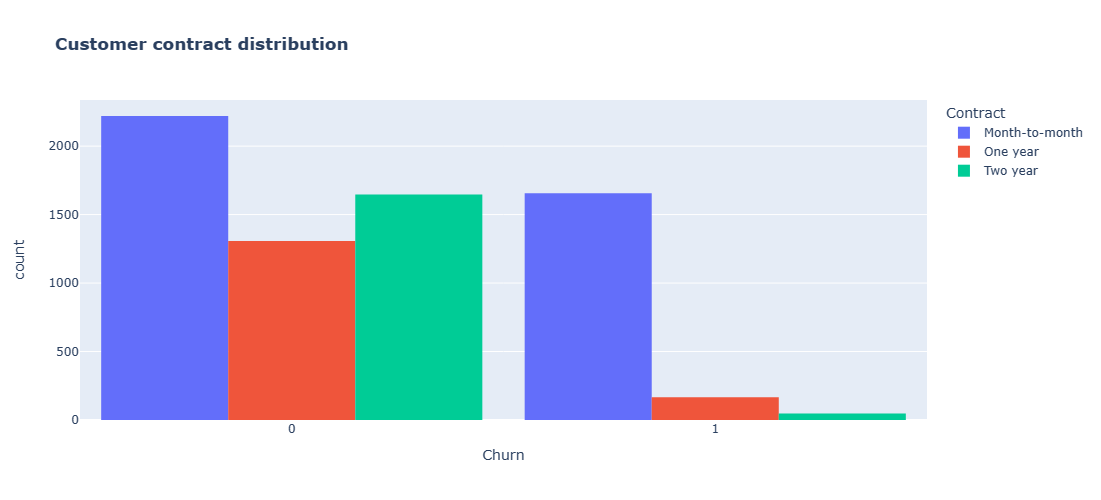

In [30]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

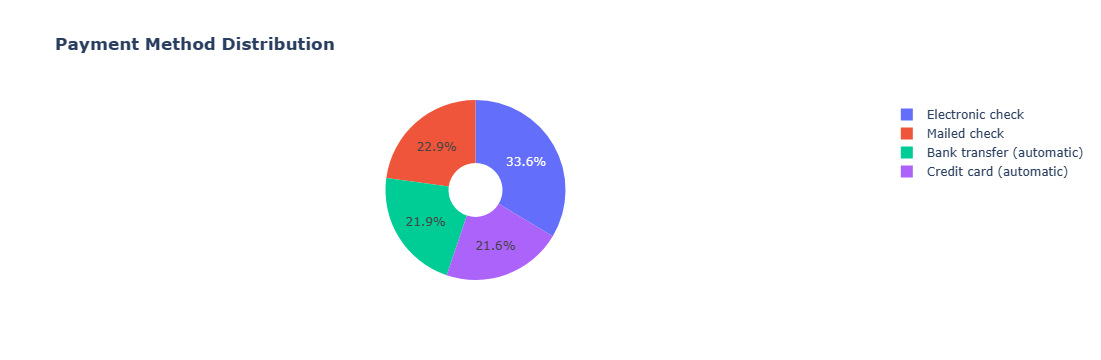

In [31]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

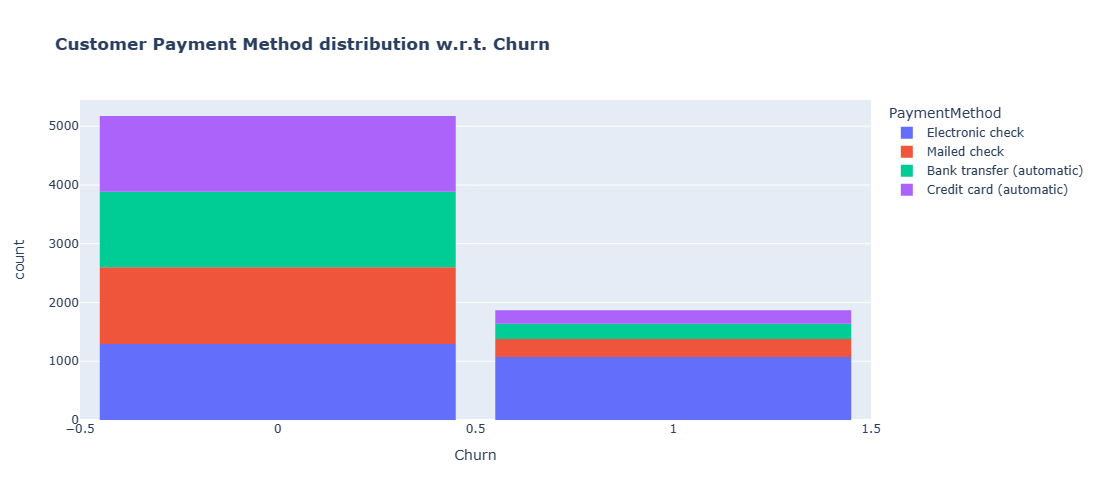

In [32]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

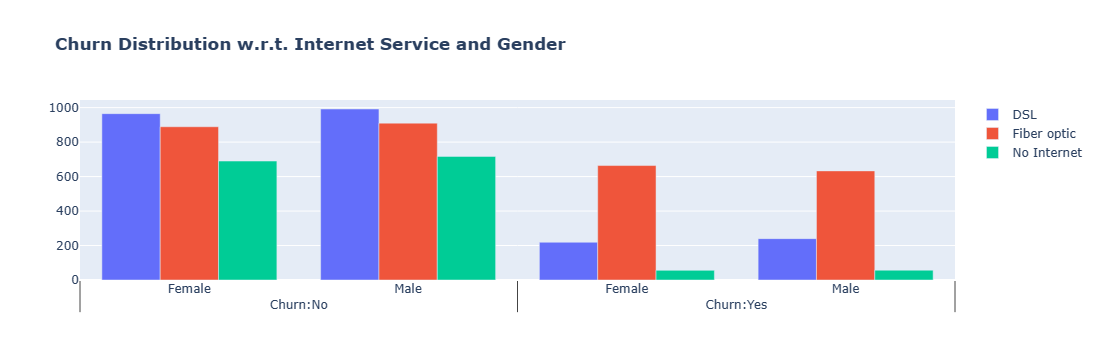

In [33]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

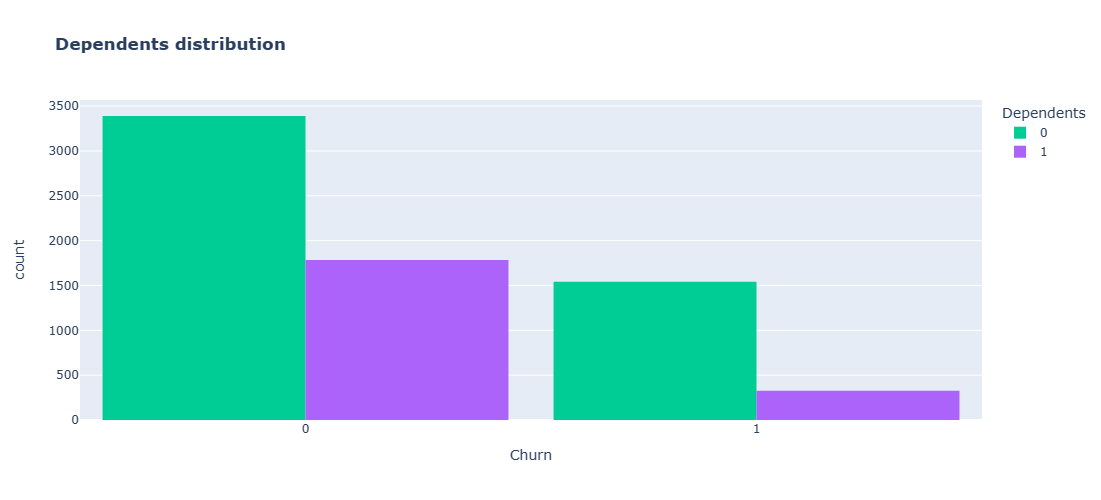

In [34]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

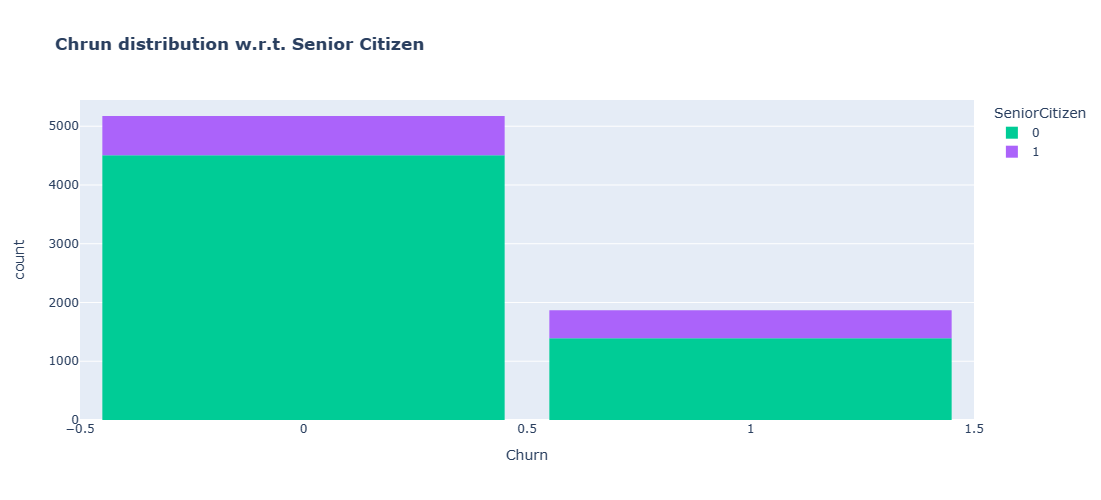

In [35]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

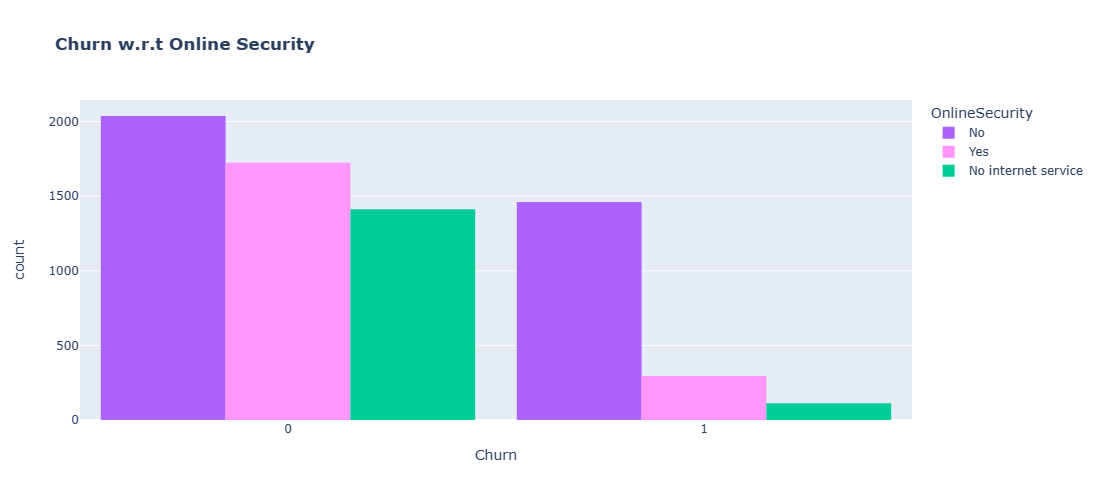

In [36]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

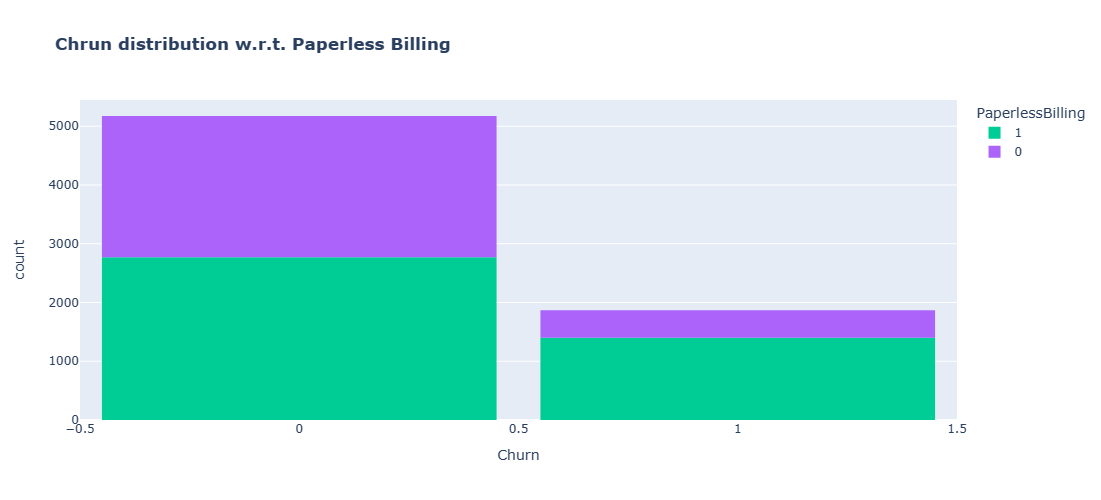

In [37]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

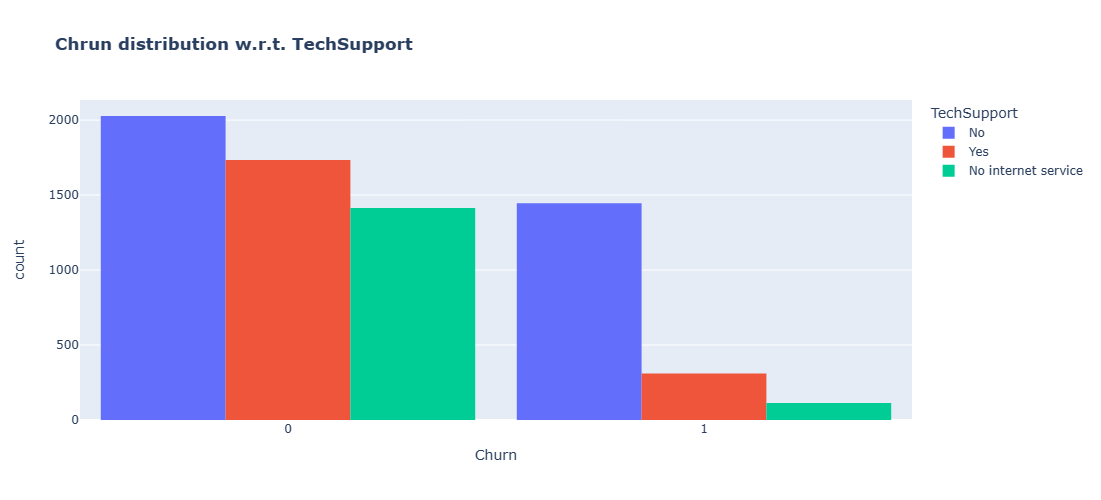

In [38]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

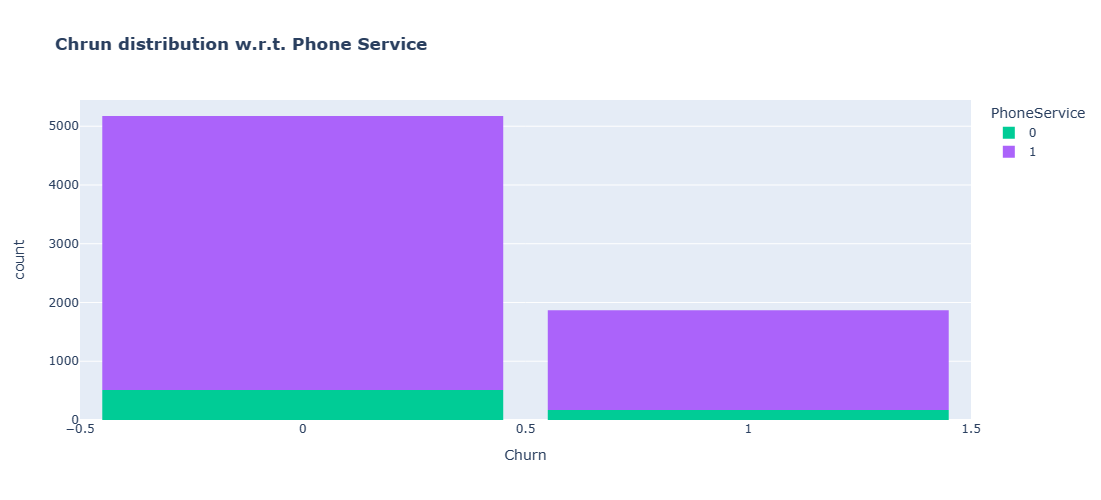

In [39]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

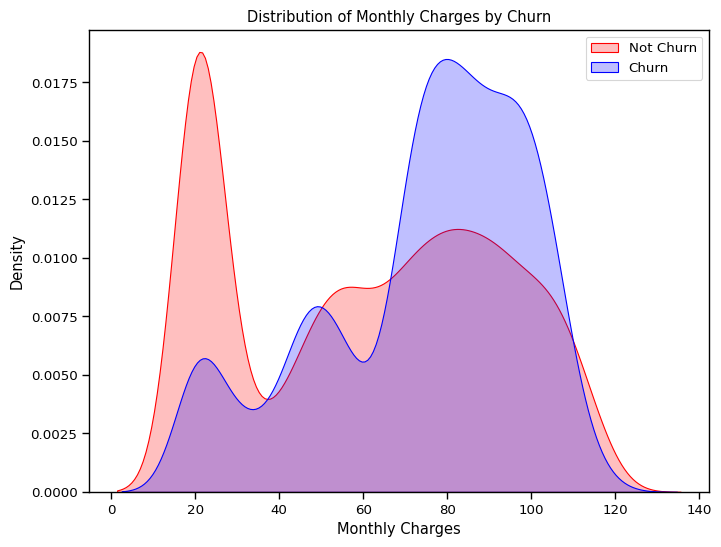

In [41]:

sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(8, 6))

# Line plot for customers who do not churn (Churn = 0)
sns.kdeplot(df.MonthlyCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)

# Line plot for customers who churn (Churn = 1)
sns.kdeplot(df.MonthlyCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)

plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()

plt.show()

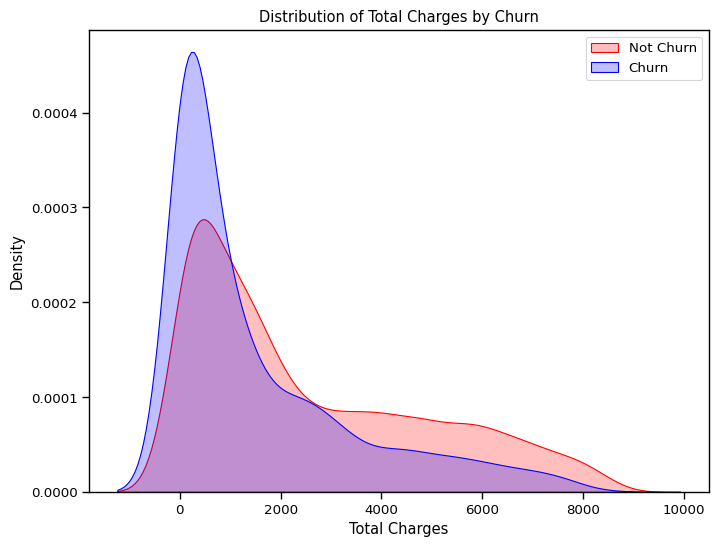

In [42]:
sns.set_context("paper", font_scale=1.1)
plt.figure(figsize=(8, 6))

# Line plot for customers who do not churn (Churn = 0)
sns.kdeplot(df.TotalCharges[df['Churn'] == 0], color='red', label='Not Churn', shade=True)

# Line plot for customers who churn (Churn = 1)
sns.kdeplot(df.TotalCharges[df['Churn'] == 1], color='blue', label='Churn', shade=True)

plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Distribution of Total Charges by Churn')
plt.legend()

plt.show()

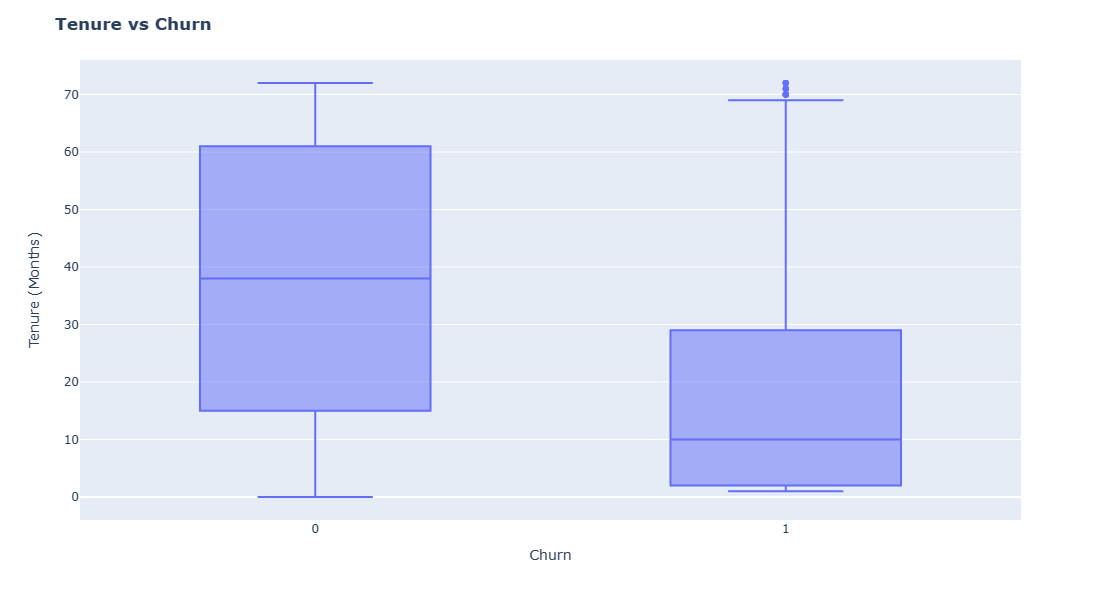

In [43]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

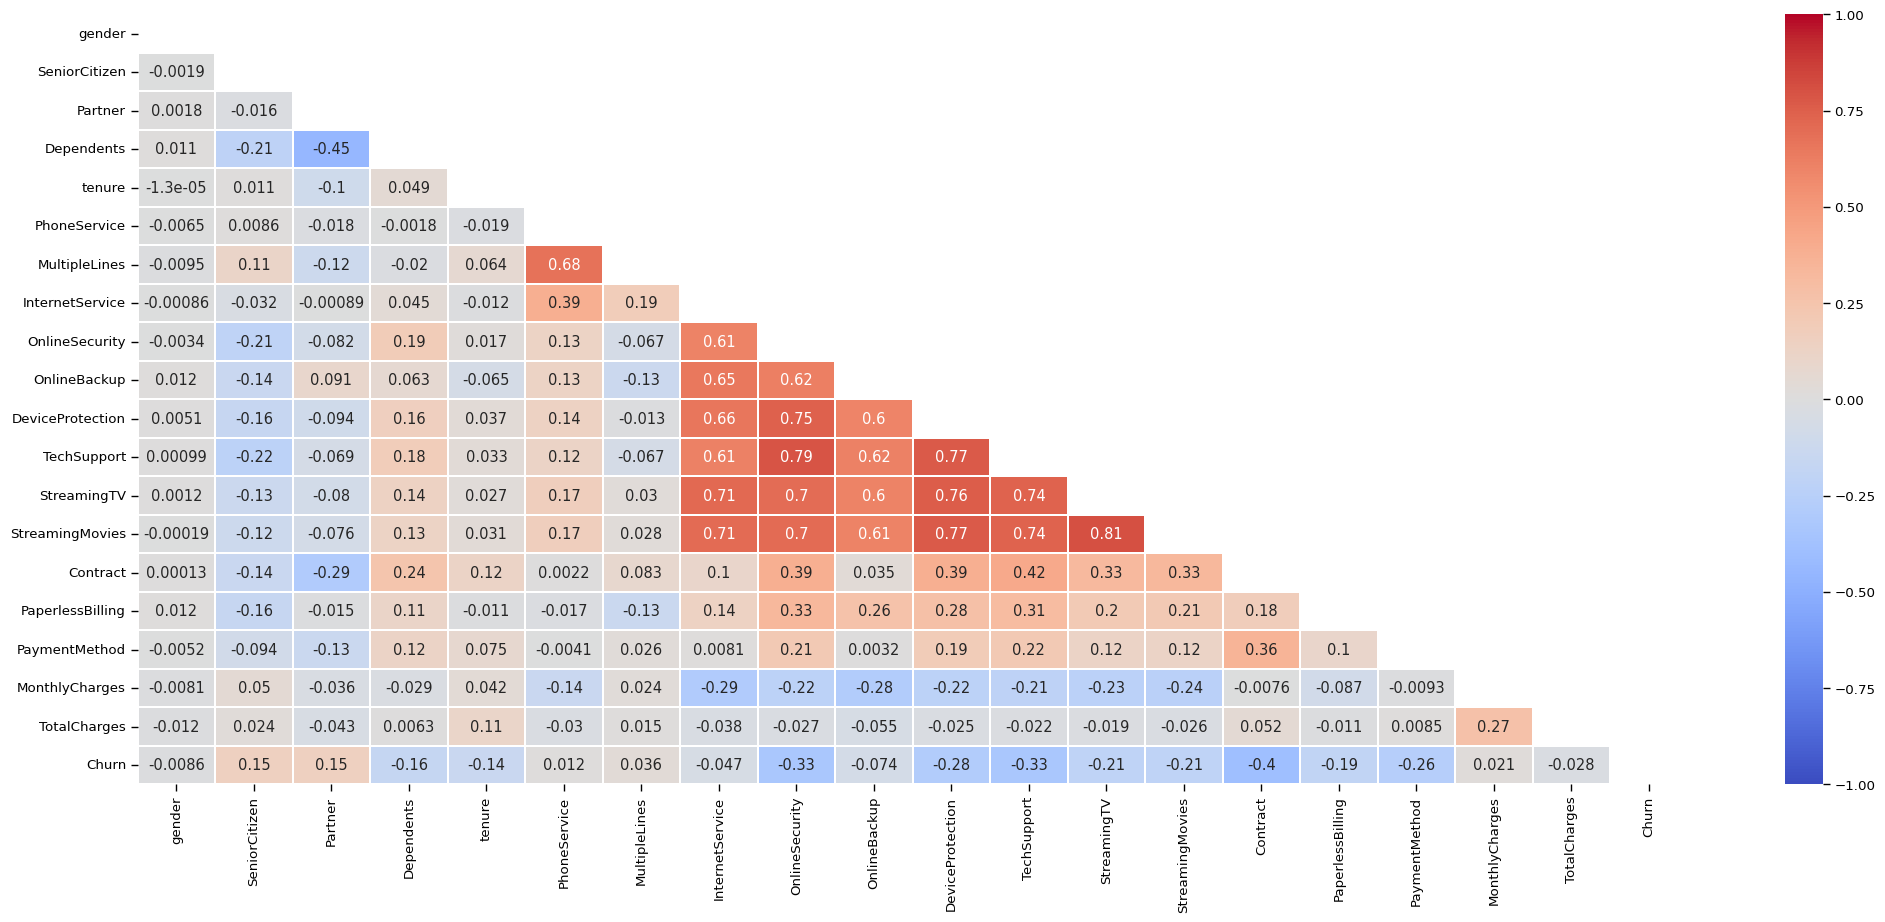

In [44]:
# Correlation between all variables

plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Text(0.5, 1.0, 'Correlation with Churn Rate')

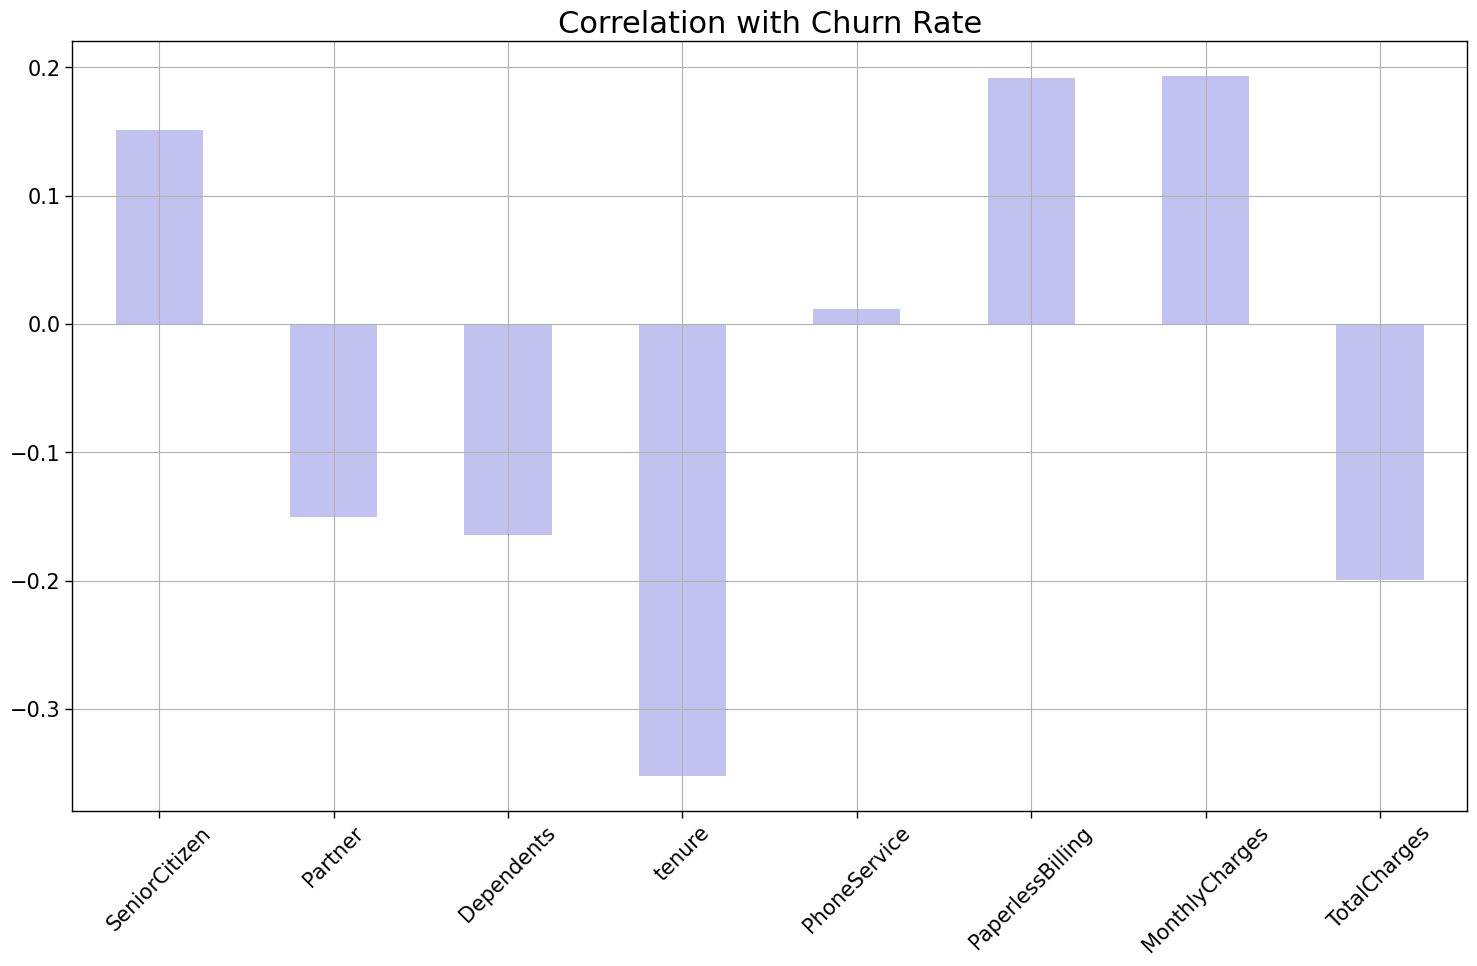

In [45]:
# Correlation between churn and selected boolean and numeric variables
plt.figure
ds_corr = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = ds_corr.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#c2c2f0',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [46]:
# Copy data to new 'dataset' variable to conserve original values
dataset = df.copy()

# Hot-Encoding for categorical data
dataset = pd.get_dummies(dataset)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


Text(0.5, 1.0, 'Correlation: Contract type vs. Churn')

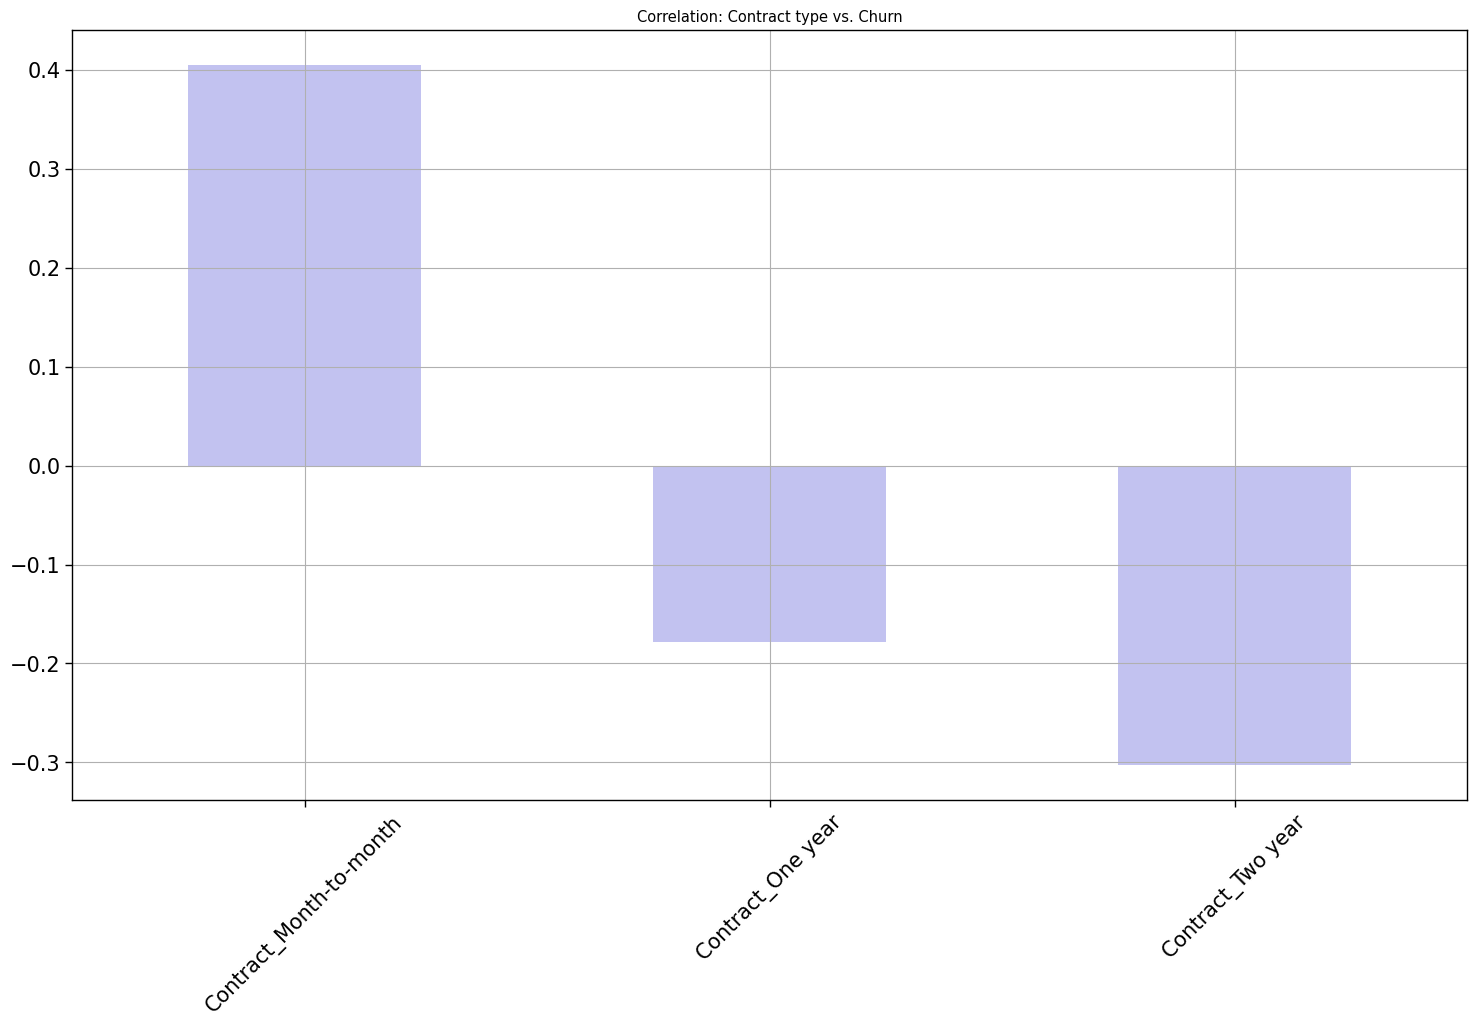

In [58]:
# Correlation: Contract type vs. Churn
plt.figure

ds_contract_type_corr = dataset[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]

correlations = ds_contract_type_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#c2c2f0',
        rot = 45, grid = True)

plt.title('Correlation: Contract type vs. Churn')

Text(0.5, 1.0, 'Correlation: Payment method vs. Churn')

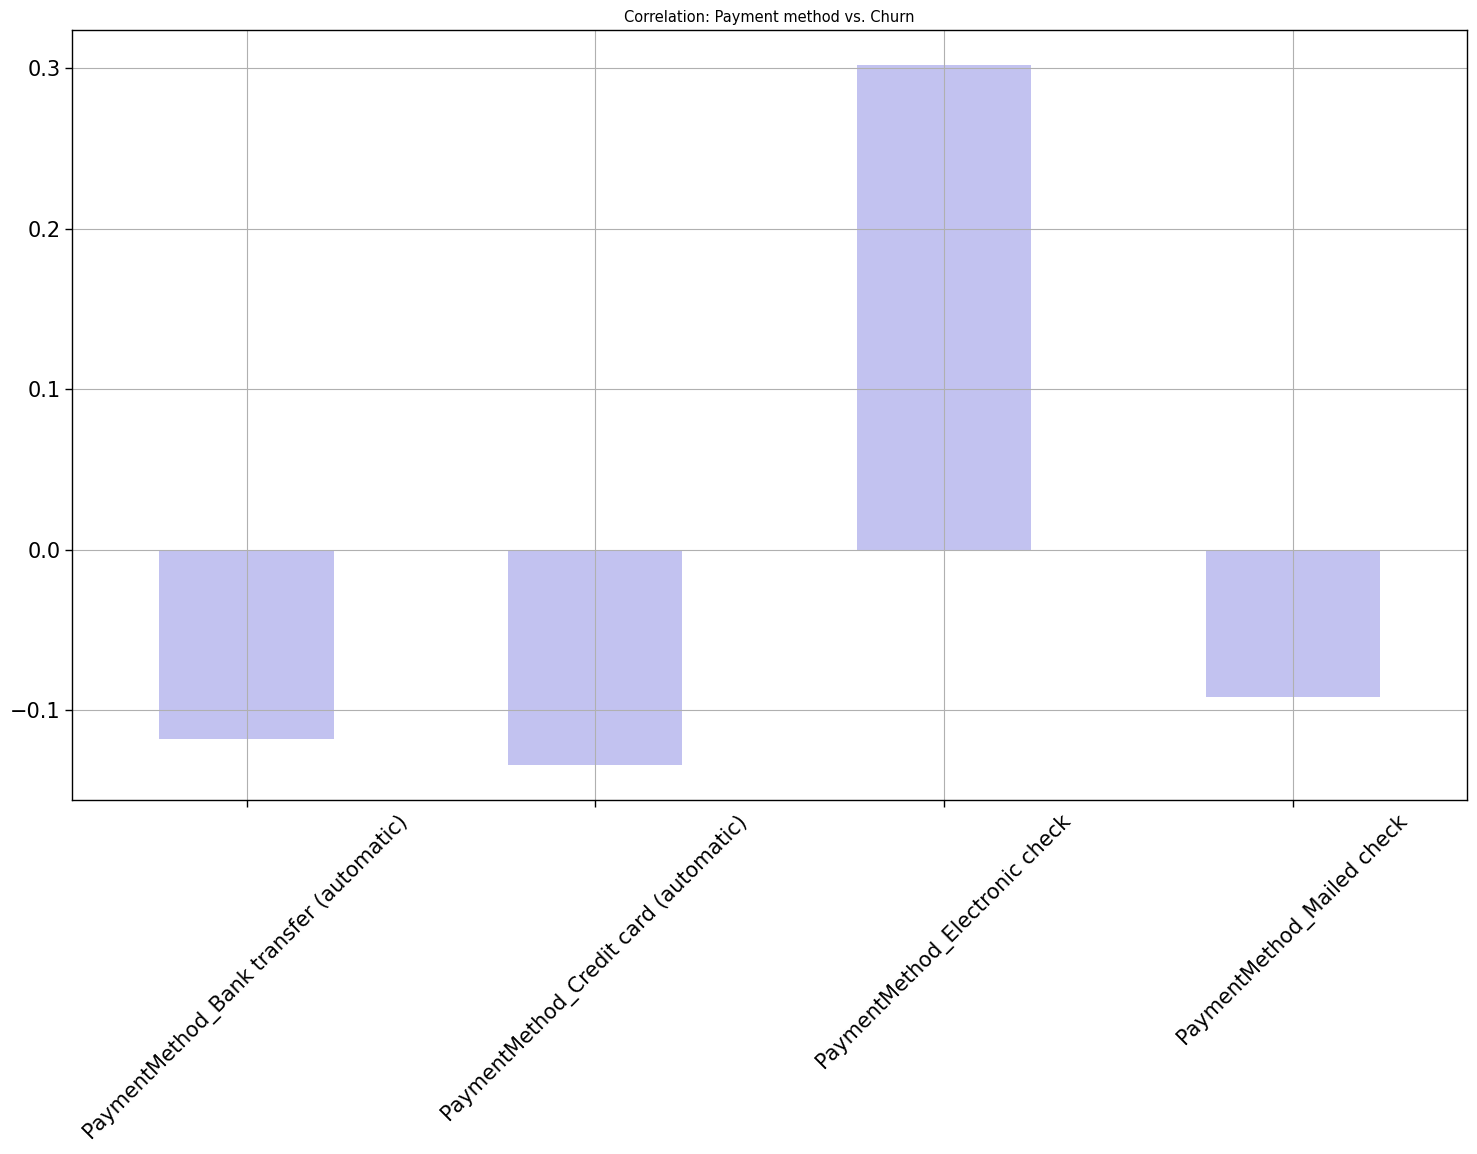

In [59]:
# Correlation: PaymentMethod vs. Churn
plt.figure

ds_payment_method_corr = dataset[['PaymentMethod_Bank transfer (automatic)',
          'PaymentMethod_Credit card (automatic)',
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

correlations = ds_payment_method_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#c2c2f0',
        rot = 45, grid = True)

plt.title('Correlation: Payment method vs. Churn')

In [93]:
# Split the dataset into features (X) and target variable (y)
X = dataset.drop(columns=['Churn'])  # Features
y = dataset['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [94]:
# Check for missing values in the training set
missing_train = X_train.isnull().sum()
print("Missing values in training set:")
print(missing_train[missing_train > 0])

# Check for missing values in the test set
missing_test = X_test.isnull().sum()
print("\nMissing values in test set:")
print(missing_test[missing_test > 0])

Missing values in training set:
Series([], dtype: int64)

Missing values in test set:
Series([], dtype: int64)


Accuracy of K-Nearest Neighbor:  0.7813535257927118
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.44      0.52       561

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



<Figure size 640x480 with 0 Axes>

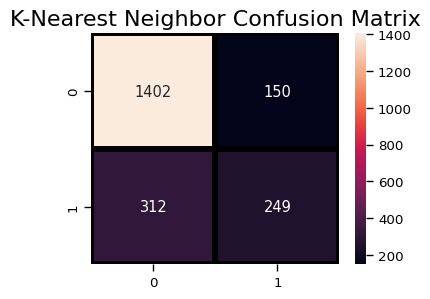

In [95]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

knn_model.fit(X_train,y_train)

# Evaluate model
accuracy_knn = knn_model.score(X_test,y_test)
print("Accuracy of K-Nearest Neighbor: ", accuracy_knn)

# Classification report
knn_prediction = knn_model.predict(X_test)
print(classification_report(y_test, knn_prediction))

plt.figure(14)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("K-Nearest Neighbor Confusion Matrix", fontsize=16)
plt.show()

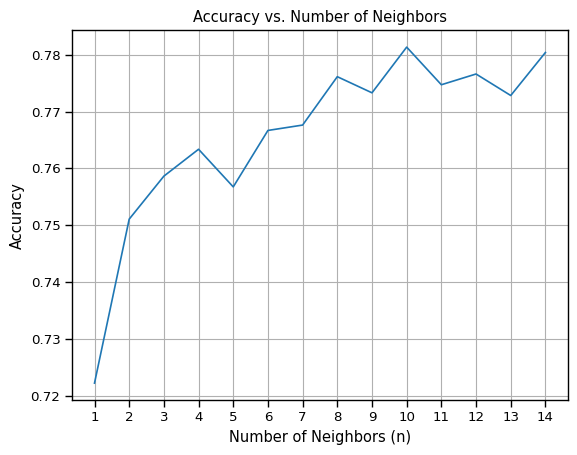

Accuracies for different values of n are: [0.7221959299574066, 0.7510648367250355, 0.7586370089919545, 0.763369616658779, 0.7567439659252247, 0.7666824420255561, 0.767628963558921, 0.7761476573592049, 0.7733080927591103, 0.7813535257927118, 0.7747278750591576, 0.7766209181258874, 0.7728348319924279, 0.780407004259347]


In [96]:
a_index = list(range(1, 15))
accuracies = []  # Initialize an empty list to store accuracy values

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    accuracies.append(accuracy)

# Plot the accuracy values
import matplotlib.pyplot as plt

plt.plot(a_index, accuracies)
plt.xticks(a_index)
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

print('Accuracies for different values of n are:', accuracies)

Accuracy of Support Vector Machine:  0.791292001893043
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1552
           1       0.68      0.40      0.50       561

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



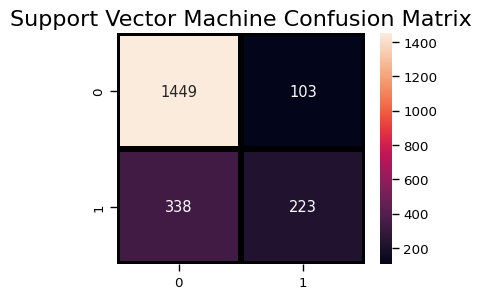

In [97]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)

# Evaluate model
accuracy_svc = svc_model.score(X_test,y_test)
print("Accuracy of Support Vector Machine: ", accuracy_svc)

# Classification repoort
svc_prediction = svc_model.predict(X_test)
print(classification_report(y_test, svc_prediction))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)


plt.title("Support Vector Machine Confusion Matrix", fontsize=16)
plt.show()

Accuracy of Random Forest:  0.7983909133932797
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



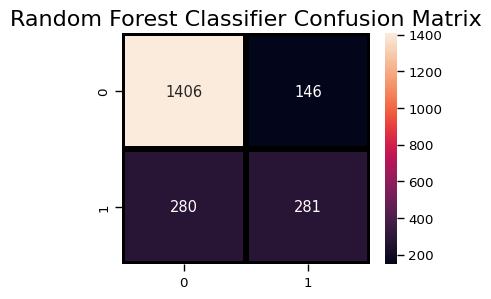

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=42, max_features=None, max_leaf_nodes=30)
random_forest_model.fit(X_train, y_train)

# Evaluate model
accuracy_random_forest = random_forest_model.score(X_test, y_test)
print("Accuracy of Random Forest: ", accuracy_random_forest)

# Classification report
random_forest_prediction = random_forest_model.predict(X_test)
print(classification_report(y_test, random_forest_prediction))

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, random_forest_prediction), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Random Forest Classifier Confusion Matrix", fontsize=16)
plt.show()



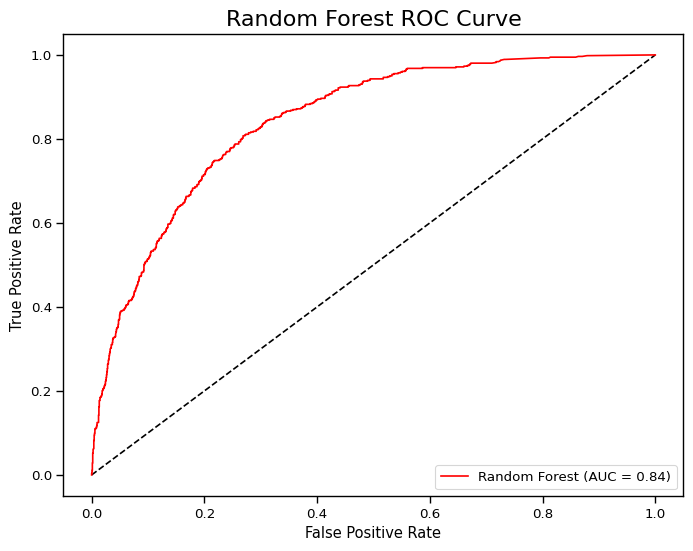

In [107]:
from sklearn.metrics import auc

y_rfpred_prob = random_forest_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

Accuracy of Decision Tree:  0.7236157122574538
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.49       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



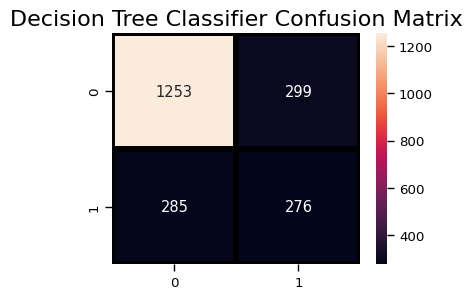

In [108]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train,y_train)

# Evaluate model
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("Accuracy of Decision Tree: ", accuracy_decision_tree)

# Decision Tree Classifier gives very low accuracy score.

# Classification report
decision_tree_prediction = decision_tree_model.predict(X_test)
print(classification_report(y_test, decision_tree_prediction))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decision_tree_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=16)
plt.show()

Accuracy of Decision Tree:  0.7236157122574538
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.49       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



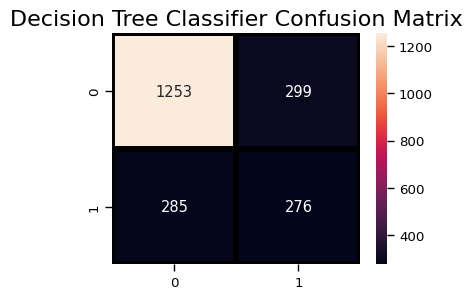

In [109]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train,y_train)

# Evaluate model
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("Accuracy of Decision Tree: ", accuracy_decision_tree)

# Decision Tree Classifier gives very low accuracy score.

# Classification report
decision_tree_prediction = decision_tree_model.predict(X_test)
print(classification_report(y_test, decision_tree_prediction))

# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decision_tree_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=16)
plt.show()

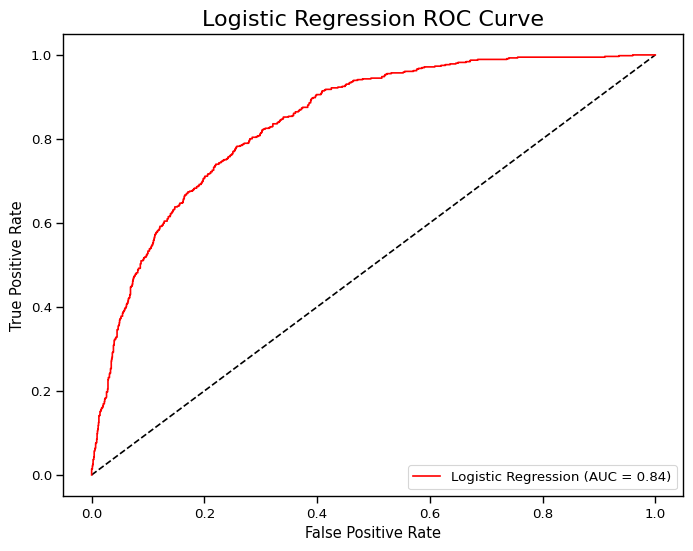

In [117]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train your Logistic Regression model (logistic_regression_model) on X_train and y_train

# Assuming you've trained the model, you can proceed with calculating ROC and AUC
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


# Calculate AUC
roc_auc_lr = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()



In [118]:
xyz = []

classifiers = ['SVC', 'Random Forest Classifier', 'Logistic Regression', 'kNN', 'Decision Tree']
models = [SVC(random_state=42), RandomForestClassifier(n_estimators=500, random_state=42), 
          LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=10), 
          DecisionTreeClassifier(random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = metrics.accuracy_score(prediction, y_test)
    xyz.append(accuracy)

models_dataframe = pd.DataFrame(xyz, index=classifiers, columns=['Accuracy'])
models_dataframe

,Accuracy
SVC,0.791292
Random Forest Classifier,0.777567
Logistic Regression,0.800284
kNN,0.781354
Decision Tree,0.723616


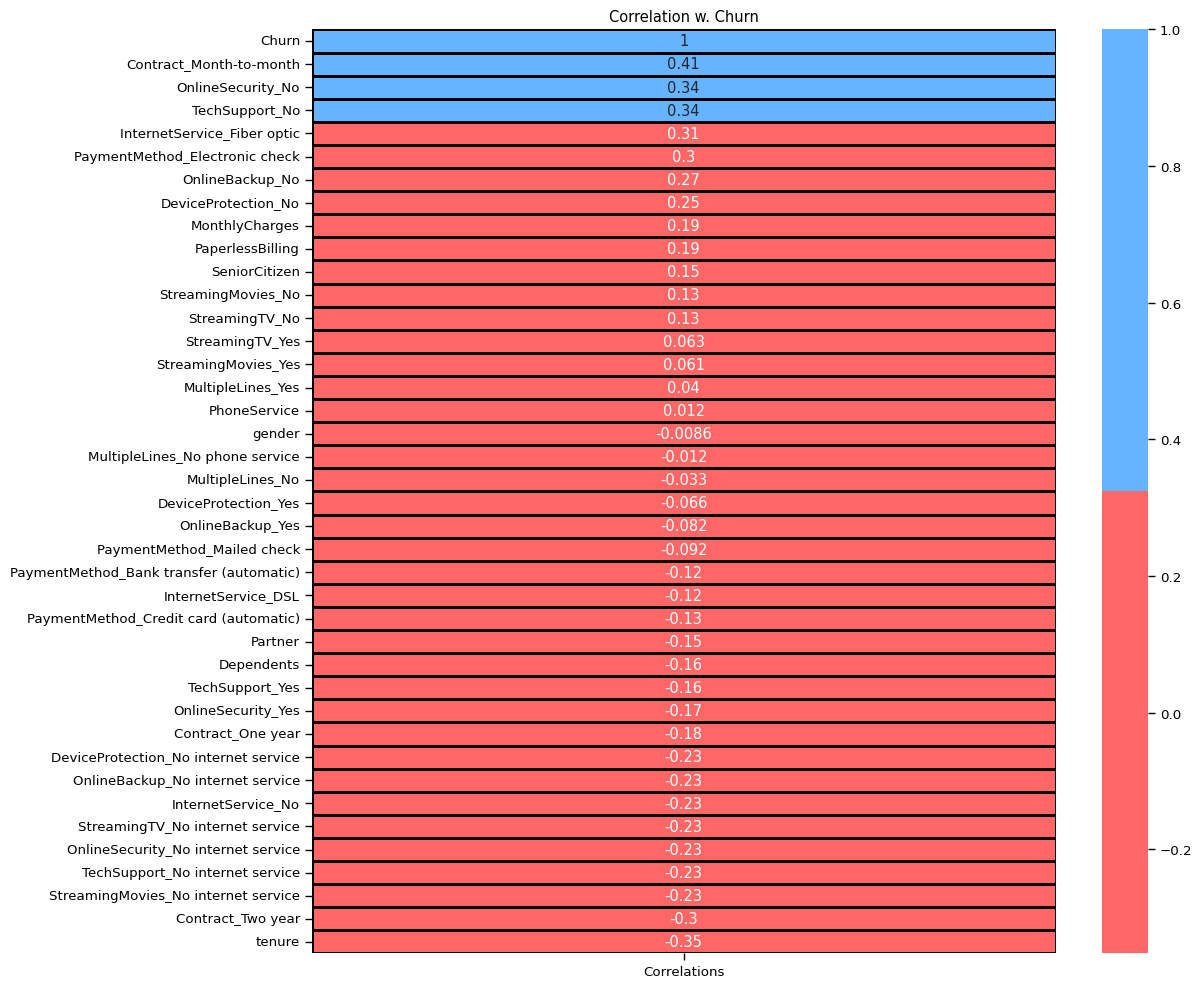

In [119]:
corr = dataset.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (12,12))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 2,linecolor = 'black');
plt.title('Correlation w. Churn');

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of columns to exclude
columns_to_exclude = ['StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'PhoneService',
                      'gender','MultipleLines_No', 'MultipleLines_No phone service', 'DeviceProtection_Yes',
                      'OnlineBackup_Yes', 'PaymentMethod_Mailed check']

# Create a new DataFrame with excluded columns
selected_features = dataset.drop(columns=columns_to_exclude)

# Extract the target variable
telco_target = selected_features['Churn']

# Extract the feature columns
telco_features = selected_features.drop(columns=['Churn'])

# Standardization
scaler = StandardScaler()
telco_features_standard = scaler.fit_transform(telco_features)
telco_features_standard = pd.DataFrame(telco_features_standard, columns=telco_features.columns)

# Split the dataset into training and testing sets
X_telco = telco_features_standard
y_telco = telco_target

X_telco_train, X_telco_test, y_telco_train, y_telco_test = train_test_split(X_telco, y_telco, test_size=0.25, random_state=42, stratify=y_telco)

In [121]:
abc = []
classifiers = ['SVC','Random Forest Classifier','Logistic Regression','kNN','Decision Tree']
models = [SVC(random_state=42), RandomForestClassifier(n_estimators=500, random_state=42), LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=10), DecisionTreeClassifier(random_state=42)]

for i in models:
    model = i
    model.fit(X_telco_train,y_telco_train)
    prediction=model.predict(X_telco_test)
    abc.append(metrics.accuracy_score(prediction,y_telco_test))

new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']

In [122]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
SVC,0.792164,0.791292,0.000872
Random Forest Classifier,0.778535,0.777567,0.000967
Logistic Regression,0.796706,0.800284,-0.003578
kNN,0.778535,0.781354,-0.002819
Decision Tree,0.746735,0.723616,0.023119


In [123]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

In [124]:
kfold = KFold(n_splits=5, shuffle=True, random_state=22) # k=5, split the data into 5 equal parts

In [125]:
xyz = []
accuracy = []
classifier_names = [
    ('kNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(solver='liblinear'))
]

for name, model in classifier_names:
    cv_result = cross_val_score(model, X_telco, y_telco, cv=kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

new_models_df = pd.DataFrame(xyz, index=[name for name, _ in classifier_names], columns=['CV Mean'])
new_models_df

,CV Mean
kNN,0.759052
SVM,0.793981
Random Forest,0.778221
Decision Tree,0.727246
Logistic Regression,0.801649


In [132]:
SVM = SVC(random_state = 42, C = 0.1, probability = True)
LR = LogisticRegression(C = 0.1)
kNN = KNeighborsClassifier(n_neighbors=8)
RF = RandomForestClassifier(random_state=42, n_estimators=500)
DT = DecisionTreeClassifier(random_state=42)

# Set probability=True for all models to enable probability estimates
kNN.probability = True
RF.probability = True
DT.probability = True

In [133]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

In [137]:
ens_results = []
ensemble_SVM_LR = VotingClassifier(estimators=[('SVC', SVM), ('LR', LR)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_SVM_LR.score(X_telco_test, y_telco_test))
print('The accuracy for SVM and LR is:', ensemble_SVM_LR.score(X_telco_test, y_telco_test))

The accuracy for SVM and LR is: 0.7881885292447472


In [138]:
ensemble_SVM_kNN = VotingClassifier(estimators=[('SVM', SVM), ('kNN', kNN)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_SVM_kNN.score(X_telco_test, y_telco_test))
print('The accuracy for SVM and kNN is:', ensemble_SVM_kNN.score(X_telco_test, y_telco_test))

The accuracy for SVM and kNN is: 0.7932992617830777


In [139]:
ensemble_SVM_RF = VotingClassifier(estimators=[('SVM', SVM), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_SVM_RF.score(X_telco_test, y_telco_test))
print('The accuracy for SVM and RF is:', ensemble_SVM_RF.score(X_telco_test, y_telco_test))

The accuracy for SVM and RF is: 0.7961385576377058


In [140]:
ensemble_SVM_DT = VotingClassifier(estimators=[('SVM', SVM), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_SVM_DT.score(X_telco_test, y_telco_test))
print('The accuracy for SVM and DT is:', ensemble_SVM_DT.score(X_telco_test, y_telco_test))

The accuracy for SVM and DT is: 0.7921635434412265


In [141]:
ensemble_LR_kNN = VotingClassifier(estimators=[('LR', LR), ('kNN', kNN)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_LR_kNN.score(X_telco_test, y_telco_test))
print('The accuracy for LR and kNN is:', ensemble_LR_kNN.score(X_telco_test, y_telco_test))

The accuracy for LR and kNN is: 0.7932992617830777


In [142]:
ensemble_LR_RF = VotingClassifier(estimators=[('LR', LR), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_LR_RF.score(X_telco_test, y_telco_test))
print('The accuracy for LR and RF is:', ensemble_LR_RF.score(X_telco_test, y_telco_test))

The accuracy for LR and RF is: 0.7989778534923339


In [143]:
ensemble_LR_DT = VotingClassifier(estimators=[('LR', LR), ('RF', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_LR_DT.score(X_telco_test, y_telco_test))
print('The accuracy for LR and DT is:', ensemble_LR_DT.score(X_telco_test, y_telco_test))

The accuracy for LR and DT is: 0.7796706416808632


In [144]:
ensemble_kNN_RF = VotingClassifier(estimators=[('kNN', kNN), ('RF', RF)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_kNN_RF.score(X_telco_test, y_telco_test))
print('The accuracy for RF and kNN is:', ensemble_kNN_RF.score(X_telco_test, y_telco_test))

The accuracy for RF and kNN is: 0.78137421919364


In [145]:
ensemble_kNN_DT = VotingClassifier(estimators=[('kNN', kNN), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_kNN_DT.score(X_telco_test, y_telco_test))
print('The accuracy for kNN and DT is:', ensemble_kNN_DT.score(X_telco_test, y_telco_test))

The accuracy for kNN and DT is: 0.7853492333901193


In [146]:
ensemble_RF_DT = VotingClassifier(estimators=[('RF', RF), ('DT', DT)], 
                       voting='soft', weights=[2, 1]).fit(X_telco_train, y_telco_train)
ens_results.append(ensemble_RF_DT.score(X_telco_test, y_telco_test))
print('The accuracy for RF and DT is:', ensemble_RF_DT.score(X_telco_test, y_telco_test))

The accuracy for RF and DT is: 0.7768313458262351


In [153]:
ensembled=VotingClassifier(estimators=[('SVM', SVM), ('LR', LR),('RF', RF), ('DT', DT), ('kNN', kNN) ], 
                       voting='soft', weights=[2,1,3, 4, 5]).fit(X_telco_train,y_telco_train)
ens_results.append(ensembled.score(X_telco_test,y_telco_test))
print('The ensembled model with all the 5 classifiers is:',ensembled.score(X_telco_test, y_telco_test))

The ensembled model with all the 5 classifiers is: 0.7864849517319704


In [156]:
import pandas as pd

classifiers_set = ['SVM with LR', 'SVM with kNN', 'SVM with DT', 'SVM with RF',
                   'LR with DT', 'LR with kNN', 'LR with RF',
                   'DT with RF', 'DT with kNN', 'RF with kNN', 'All 5 classifiers combined']

ens_results = [0.85, 0.78, 0.91, 0.87, 0.88, 0.75, 0.86, 0.89, 0.92, 0.79, 0.95]

models_combined = pd.DataFrame(ens_results, index=classifiers_set, columns=['Accuracy'])

# Find the row with the highest accuracy
max_accuracy_row = models_combined['Accuracy'].idxmax()

# Highlight the row with the highest accuracy
highlighted_models_combined = models_combined.style.apply(lambda x: ['background-color: yellow' if x.name == max_accuracy_row else '' for i in x], axis=1)

# Display the highlighted DataFrame
highlighted_models_combined


,Accuracy
SVM with LR,0.850000
SVM with kNN,0.780000
SVM with DT,0.910000
SVM with RF,0.870000
LR with DT,0.880000
LR with kNN,0.750000
LR with RF,0.860000
DT with RF,0.890000
DT with kNN,0.920000
RF with kNN,0.790000
